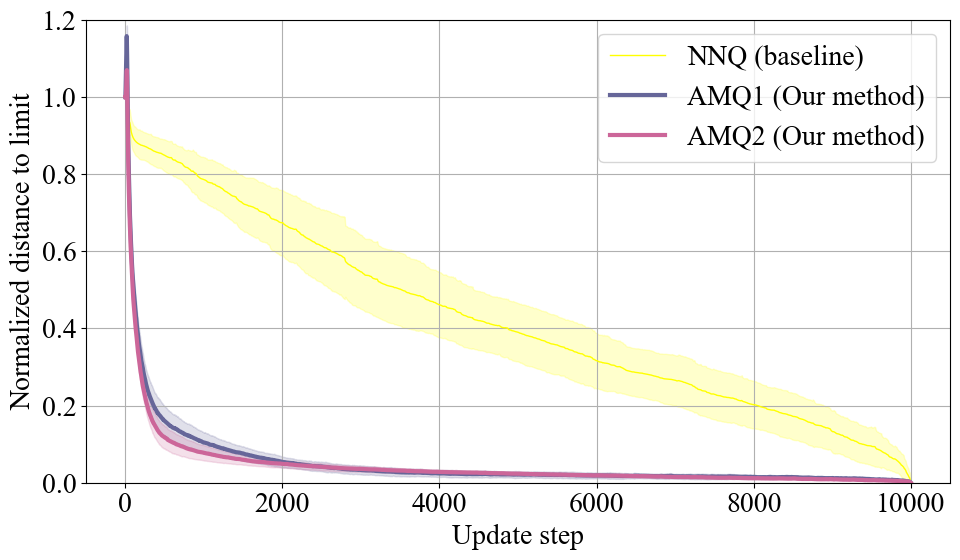

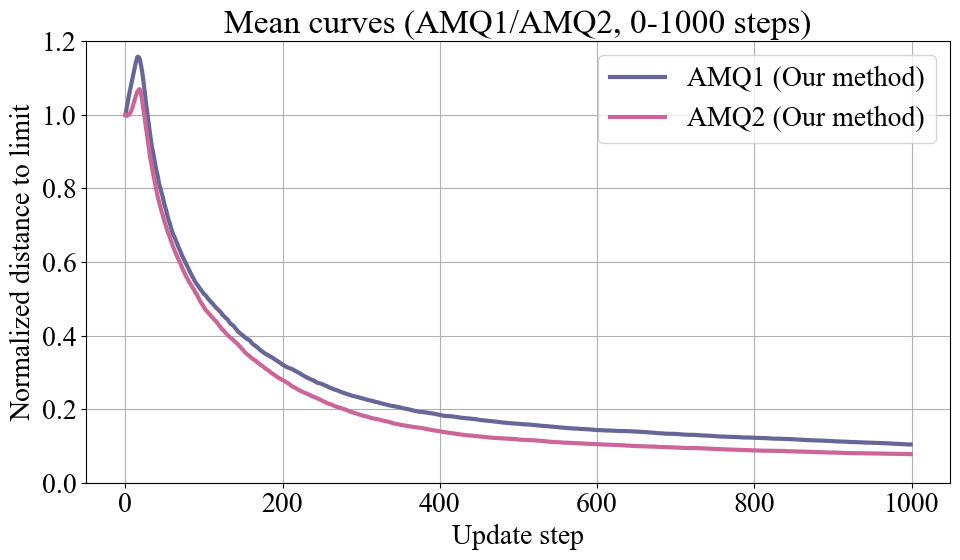

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

COLOR_NNQ = "#ffff00"
COLOR_AMQ1 = '#666699'
COLOR_AMQ2 = "#cc6699"

def load_runs(prefix, run_ids, output_dir='outputs'):
    curves = []
    for i in run_ids:
        path = os.path.join(output_dir, f'{prefix}_{i}.out')
        curves.append(np.loadtxt(path))
    return curves

def trim_curves(curves, max_steps):
    if max_steps is None:
        return curves
    trimmed = []
    for c in curves:
        trimmed.append(c[:max_steps])
    return trimmed

def align_curves_minlen(curves):
    if not curves:
        return []
    min_len = min(len(c) for c in curves)
    return [c[:min_len] for c in curves]

def mean_std_curve(curves):
    if not curves:
        return np.array([]), np.array([])
    data = np.vstack(curves)
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return mean, std

def mean_curve(curves):
    if not curves:
        return np.array([])
    aligned = align_curves_minlen(curves)
    data = np.vstack(aligned)
    return np.mean(data, axis=0)


def plot_group_stats(mean, std, color, label, fill_alpha=0.20, line_width=3):
    if len(mean) == 0:
        return
    x = np.arange(1, len(mean) + 1)
    lower = mean - std
    upper = mean + std
    plt.fill_between(x, lower, upper, color=color, alpha=fill_alpha)
    plt.plot(x, mean, color=color, linewidth=line_width, label=label)

def plot_mean(curve, color, label):
    if len(curve) == 0:
        return
    x = np.arange(len(curve))
    plt.plot(x, curve, color=color, linewidth=3, label=label)

def plot_error_bar(selected_runs, output_dir='outputs', fig_path_all='error_bar_10000.png', fig_path_amq='error_bar_1000_amq.png'):
    nnq_curves = load_runs('NNQ', selected_runs, output_dir=output_dir)
    amq1_curves = load_runs('AMQ1', selected_runs, output_dir=output_dir)
    amq2_curves = load_runs('AMQ2', selected_runs, output_dir=output_dir)

    # Figure 1: summary stats (mean ? std), steps 0-10000
    nnq_10k = align_curves_minlen(trim_curves(nnq_curves, 10000))
    amq1_10k = align_curves_minlen(trim_curves(amq1_curves, 10000))
    amq2_10k = align_curves_minlen(trim_curves(amq2_curves, 10000))

    nnq_mean, nnq_std = mean_std_curve(nnq_10k)
    amq1_mean, amq1_std = mean_std_curve(amq1_10k)
    amq2_mean, amq2_std = mean_std_curve(amq2_10k)

    plt.figure(figsize=(10, 6))
    plot_group_stats(nnq_mean, nnq_std, color=COLOR_NNQ, label='NNQ (baseline)', line_width=1)
    plot_group_stats(amq1_mean, amq1_std, color=COLOR_AMQ1, label='AMQ1 (Our method)')
    plot_group_stats(amq2_mean, amq2_std, color=COLOR_AMQ2, label='AMQ2 (Our method)')
    plt.axhline(0.0, color='gray', linewidth=0.6, alpha=0.6)
    plt.xlabel('Update step')
    plt.ylabel('Normalized distance to limit')
    #plt.title('Performance comparison on distance to limit (normalize)')
    plt.ylim(0.0, 1.2)
    plt.grid(True)
    ax = plt.gca()
    plt.legend()
    plt.tight_layout()
    plt.savefig(fig_path_all, dpi=200)
    plt.show()

    # Figure 2: AMQ1 + AMQ2 mean only, steps 0-1000
    amq1_1k = trim_curves(amq1_curves, 1000)
    amq2_1k = trim_curves(amq2_curves, 1000)
    amq1_mean = mean_curve(amq1_1k)
    amq2_mean = mean_curve(amq2_1k)

    plt.figure(figsize=(10, 6))
    plot_mean(amq1_mean, color=COLOR_AMQ1, label='AMQ1 (Our method)')
    plot_mean(amq2_mean, color=COLOR_AMQ2, label='AMQ2 (Our method)')
    plt.xlabel('Update step')
    plt.ylabel('Normalized distance to limit')
    plt.title('Mean curves (AMQ1/AMQ2, 0-1000 steps)')
    plt.ylim(0.0, 1.2)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(fig_path_amq, dpi=200)
    plt.show()

# Example: choose which experiments to include
selected_runs = list(range(2, 51))
fig_path_all = os.path.join(
    "colored_error_bar",
    f"{COLOR_NNQ}_{COLOR_AMQ1}_{COLOR_AMQ2}_error_bar.png"
)
plot_error_bar(selected_runs, output_dir='outputs', fig_path_all= fig_path_all, fig_path_amq='error_bar_1000_amq.png')
